In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [2]:
train_path = r'C:\Users\wania_96\Downloads\dogs-vs-cats (1)\train\train'
test_path = r'C:\Users\wania_96\Downloads\dogs-vs-cats (1)\test1\test1'


In [4]:
import cv2
import os
import numpy as np

# Get the list of image filenames in the directory
train_image_filenames = os.listdir(train_path)

# Load and convert images to NumPy arrays
train_images = []

for filename in train_image_filenames:
    img_path = os.path.join(train_path, filename)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV loads images in BGR format, convert to RGB
    img = cv2.resize(img, (224, 224))  # Resize images to (224, 224)
    train_images.append(img)

# Convert the list of images to a NumPy array
train_images = np.array(train_images)

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0

# Print the shape of the loaded images
print("Train Images Shape:", train_images.shape)



Train Images Shape: (25000, 224, 224, 3)


In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2

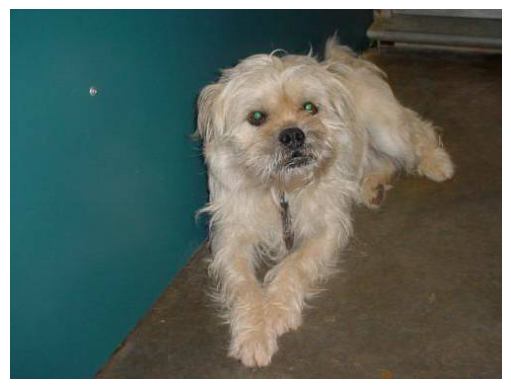

In [6]:
# Load an image using OpenCV
image_path = r'C:\Users\wania_96\Downloads\dogs-vs-cats (1)\train\train\dog.995.jpg'
image = cv2.imread(image_path)

# Convert BGR to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()

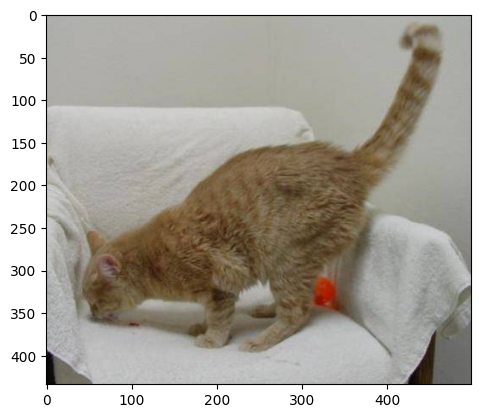

In [7]:
# display cat image
import cv2
import matplotlib.pyplot as plt

# Load an image using OpenCV
image_path = r'C:\Users\wania_96\Downloads\dogs-vs-cats (1)\train\train\cat.3319.jpg'
image = cv2.imread(image_path)

# Convert BGR to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
  # Turn off axis labels
plt.show()

In [8]:
for i in range(5):

  name = train_image_filenames[i]
  print(name[0:3])

cat
cat
cat
cat
cat


In [9]:
dog_count = 0
cat_count = 0

for img_file in train_image_filenames:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


## Resizing all the images

In [18]:
#creating a directory for resized images
os.mkdir('C:/Users/wania_96/Downloads/image resized_catvsdogs')

In [27]:
from PIL import Image
import os
original_folder = r'C:\Users\wania_96\Downloads\dogs-vs-cats (1)\train\train'
resized_folder = 'C:/Users/wania_96/Downloads/image resized_catvsdogs/'
# Ensure the resized folder exists, create it if not
if not os.path.exists(resized_folder):
    os.makedirs(resized_folder)

# Counters for the number of cat and dog images processed
cat_count = 0
dog_count = 0

# Loop through the files in the original folder
for filename in os.listdir(original_folder):
    img_path = os.path.join(original_folder, filename)

    # Check if it's a cat image
    if filename.startswith('cat') and cat_count < 1000:
        img = Image.open(img_path)
        img = img.resize((224, 224))
        img = img.convert('RGB')

        new_img_path = os.path.join(resized_folder, filename)
        img.save(new_img_path)

        cat_count += 1

    # Check if it's a dog image
    elif filename.startswith('dog') and dog_count < 1000:
        img = Image.open(img_path)
        img = img.resize((224, 224))
        img = img.convert('RGB')

        new_img_path = os.path.join(resized_folder, filename)
        img.save(new_img_path)

        dog_count += 1

    # Stop the loop if both cat and dog counts reach 1000
    if cat_count == 1000 and dog_count == 1000:
        break


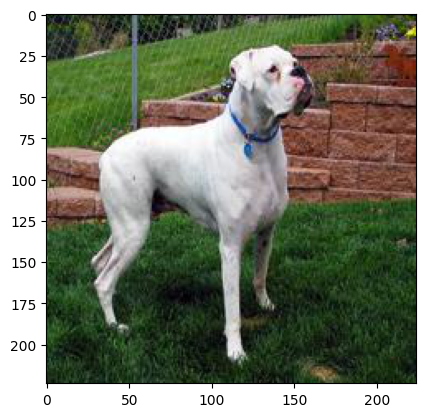

In [28]:
# display resized dog image
img = mpimg.imread(r'C:\Users\wania_96\Downloads\image resized_catvsdogs\dog.1084.jpg')
imgplt = plt.imshow(img)
plt.show()

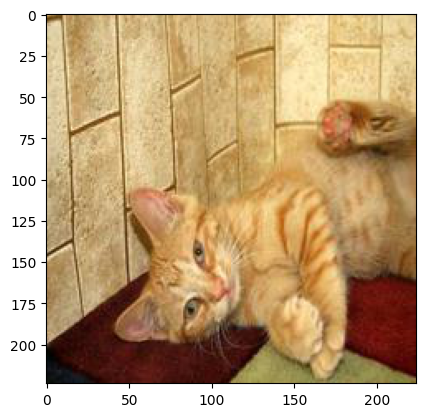

In [29]:
# display resized cat image
img = mpimg.imread(r'C:\Users\wania_96\Downloads\image resized_catvsdogs\cat.10191.jpg')
imgplt = plt.imshow(img)
plt.show()

Cat --> 0

Dog --> 1

In [30]:
# creaing a for loop to assign labels
filenames = os.listdir('C:/Users/wania_96/Downloads/image resized_catvsdogs/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [31]:
print(filenames[0:5])
print(len(filenames))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']
2000


In [32]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 0, 0]
2000


In [33]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1000 1000]


Converting all the resized images to numpy arrays

In [34]:
import cv2
import glob

In [36]:
image_directory = 'C:/Users/wania_96/Downloads/image resized_catvsdogs/'
image_extension = ['png', 'jpg']
files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])


In [37]:
print(dog_cat_images)

[[[[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 202 248]
   [123 200 246]
   [123 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 202 248]
   [124 201 247]
   [123 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [124 201 247]
   [124 201 247]]

  ...

  [[ 57 123 158]
   [ 57 123 158]
   [ 56 124 159]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]

  [[ 55 121 156]
   [ 56 122 157]
   [ 55 123 158]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]

  [[ 54 120 155]
   [ 54 120 155]
   [ 53 121 156]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]]


 [[[ 43  43  37]
   [ 47  47  41]
   [ 47  47  41]
   ...
   [181 207 207]
   [168 199 200]
   [161 194 197]]

  [[ 42  42  36]
   [ 46  46  40]
   [ 45  45  39]
   ...
   [176 202 202]
   [166 197 200]
   [162 197 200]]

  [[ 42  42  36]
   [ 44  44  38]
   [ 43  43  37]
   ...
   [168 194 194]
   [164 195 198]
   [166 201

In [38]:
type(dog_cat_images)

numpy.ndarray

In [39]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [40]:
X = dog_cat_images
Y = np.asarray(labels)

## Train Test Split

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [43]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [44]:
print(X_train_scaled)

[[[[0.03921569 0.07058824 0.09803922]
   [0.04705882 0.07843137 0.10588235]
   [0.05490196 0.08627451 0.11372549]
   ...
   [0.19607843 0.2627451  0.31372549]
   [0.18823529 0.25490196 0.30588235]
   [0.18431373 0.25098039 0.30196078]]

  [[0.05490196 0.09019608 0.10588235]
   [0.0627451  0.09411765 0.12156863]
   [0.0745098  0.10588235 0.13333333]
   ...
   [0.2        0.26666667 0.31764706]
   [0.2        0.26666667 0.31764706]
   [0.19607843 0.2627451  0.31372549]]

  [[0.0745098  0.10980392 0.1254902 ]
   [0.08627451 0.11764706 0.14509804]
   [0.10196078 0.13333333 0.16078431]
   ...
   [0.20784314 0.2745098  0.3254902 ]
   [0.21176471 0.27843137 0.32941176]
   [0.21568627 0.28235294 0.33333333]]

  ...

  [[0.61960784 0.6        0.60392157]
   [0.61960784 0.6        0.60392157]
   [0.61176471 0.60392157 0.60392157]
   ...
   [0.1372549  0.15686275 0.16078431]
   [0.16470588 0.18431373 0.18823529]
   [0.18431373 0.20392157 0.20784314]]

  [[0.58431373 0.57254902 0.55686275]
   [0.5

### Building the Neural Network

In [45]:
import tensorflow as tf
import tensorflow_hub as hub

In [47]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [48]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [49]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [50]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 27s 325ms/step - loss: 0.2268 - acc: 0.9062
Epoch 2/5
50/50 [==============================] - 16s 320ms/step - loss: 0.0781 - acc: 0.9731
Epoch 3/5
50/50 [==============================] - 16s 325ms/step - loss: 0.0592 - acc: 0.9794
Epoch 4/5
50/50 [==============================] - 17s 333ms/step - loss: 0.0515 - acc: 0.9825
Epoch 5/5
50/50 [==============================] - 17s 346ms/step - loss: 0.0383 - acc: 0.9894


In [51]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 7s 378ms/step - loss: 0.0543 - acc: 0.9825
Test Loss = 0.0542784109711647
Test Accuracy = 0.9825000166893005


#### Predictive System

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

In [52]:
from tensorflow.keras.models import load_model

model.save(r'C:\Users\wania_96\Downloads\dogs-vs-cats (1)\model.h5')